In [1]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3e}'.format})

from limits import LimitFigure
import rnog as rnog

# Starting Info

Loading in the Veffs, establishing the uptimes, and how many stations of each time will exist as a function of time.

In [3]:
# load in all the volumes

energies = rnog.veff["wp"]["energy"]

veff_hilo = rnog.veff["deep_high_low_1Hz"]["veff"]

veff_didaq_2sig = rnog.veff["simple_threshold_2"]["veff"]
veff_didaq_25sig = rnog.veff["simple_threshold_2.5"]["veff"]

veff_pa_25sig = rnog.veff["simple_threshold_2.5_downsampled"]["veff"]
veff_pa_3sig = rnog.veff["simple_threshold_3_downsampled"]["veff"]

# July 2024-2025: 8 years of hilo
# July 2025-2026: 8 years of PA (add no stations)
# July 2026-2027: 8 years of PA + 5 years of DiDAQ (add 5 DiDAQ stations)
# July 2027-2028: 8 years of PA + 11 years of DiDAQ (add 6 DiDAQ stations)
# July 2028-2029: 8 years of PA + 17 years of DiDAQ (add 6 DiDAQ stations)
# July 2029-2030: 8 years of PA + 23 years of DiDAQ (add 6 DiDAQ stations)
# July 2030-2031: 8 years of PA + 27 years of DiDAQ (add 4 DiDAQ stations, completing the array)
# July 2031-2040: 9 x (8 PA + 27 DiDAQ) -- run the array for another decade

existing_livetime = rnog.existing_livetime

uptime_hilo = 0.5
uptime_pa = 0.5
uptime_didaq = 2/3

year_start = 2024
integral_livetime_hilo = {}
integral_livetime_pa = {}
integral_livetime_didaq = {}

####
#### First, Hilo
####

integral_livetime_hilo[year_start] = existing_livetime

# hilo has the existing livetime, plus 1 more year of 8 stations at uptime_hilo
# and that amount stays constant forever, since we stop running the hilo
for y in range(1,17):
    year = year_start + y
    integral_livetime_hilo[year] = integral_livetime_hilo[year_start] + (8 * uptime_hilo)

####
#### Second, PA
####

# pa has no livetime so far, but starting 2025, we have 8 stations
num_pa_stations = {
    2024: 0, 2025: 8, 2026: 8, 2027: 8, 2028: 8, 2029: 8, 2030: 8, 2031: 8, 2032: 8, 2033: 8, 2034: 8,
    2035: 8, 2036: 8, 2037: 8, 2038: 8, 2039: 8, 2040: 8
}
integral_livetime_pa[year_start] = 0
for y in range(1,17):
    year = year_start + y
    integral_livetime_pa[year] = integral_livetime_pa[year-1] + (num_pa_stations[year] * uptime_pa)

####
#### Third, the DiDAQ
####
num_didaq_stations = {
    2024: 0, 2025: 0, 2026: 5, 2027: 11, 2028: 17, 2029: 23, 2030: 27, 2031: 27, 2032: 27, 2033: 27, 2034: 27,
    2035: 27, 2036: 27, 2037: 27, 2038: 27, 2039: 27, 2040: 27
}
integral_livetime_didaq[year_start] = 0
for y in range(1,17):
    year = year_start + y
    integral_livetime_didaq[year] = integral_livetime_didaq[year-1] + (num_didaq_stations[year] * uptime_didaq)

## Compute Limits

array([ 3.162e+07,  1.000e+08,  3.162e+08,  1.000e+09,  3.162e+09,
        1.000e+10,  3.162e+10,  1.000e+11])
array([ 6.792e-06,  1.409e-06,  5.108e-07,  2.584e-07,  1.814e-07,
        1.619e-07,  1.325e-07,  1.691e-07])
-------
array([ 3.162e+07,  1.000e+08,  3.162e+08,  1.000e+09,  3.162e+09,
        1.000e+10,  3.162e+10,  1.000e+11])
array([ 4.749e-08,  1.466e-08,  7.729e-09,  5.169e-09,  4.133e-09,
        4.324e-09,  4.378e-09,  5.757e-09])
-------
array([ 3.162e+07,  1.000e+08,  3.162e+08,  1.000e+09,  3.162e+09,
        1.000e+10,  3.162e+10,  1.000e+11])
array([ 1.552e-08,  4.823e-09,  2.566e-09,  1.735e-09,  1.394e-09,
        1.467e-09,  1.496e-09,  1.973e-09])


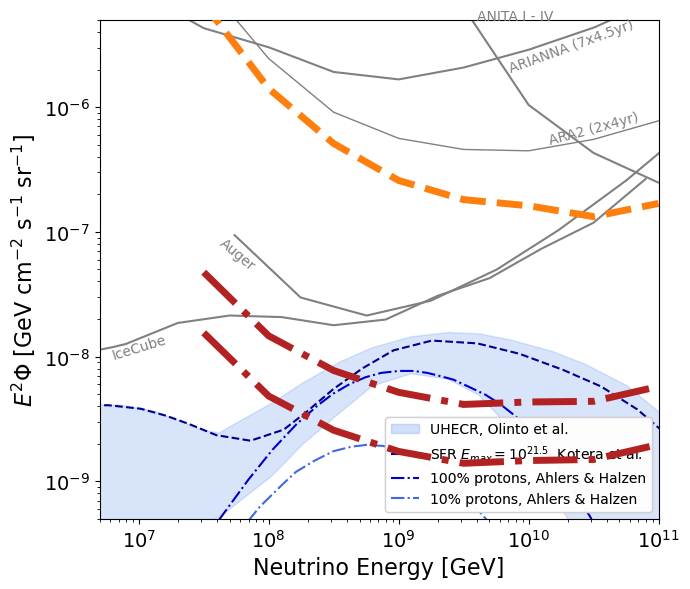

In [5]:
more_pa_2031 = integral_livetime_pa[2031]
more_didaq_2031 = integral_livetime_didaq[2031]

more_pa_2040 = integral_livetime_pa[2040]
more_didaq_2040 = integral_livetime_didaq[2040]

exposure_today = existing_livetime * veff_hilo
exposure_2031 = (existing_livetime * veff_hilo) + (more_pa_2031 * veff_pa_25sig) + (more_didaq_2031 * veff_didaq_2sig)
exposure_2040 = (existing_livetime * veff_hilo) + (more_pa_2040 * veff_pa_25sig) + (more_didaq_2040 * veff_didaq_2sig)

figure = LimitFigure(e_power=2, xlims=(5e6, 1e11), ylims=(0.5e-9, 0.5e-5), font_size=16, tick_size=14)    
figure.build_base_plot('rnog_proposal')

#####
##### on disk
#####
energies, limits = figure.add_limit(name='RNOG', energies=energies,
    veffs=exposure_today, stations=1, years=1, sup=1,
    color='C1',linestyle='--', label='RNO-G on-disk')

energies = np.asarray(energies)
limits = np.asarray(limits)
print(repr(energies))
print(repr(limits))
print('-------')

#####
##### by 2031
#####

energies, limits = figure.add_limit(name='RNOG', energies=energies,
    veffs=exposure_2031, stations=1, years=1, sup=1,
    color='firebrick',linestyle='-.', label='RNO-G 2029')

energies = np.asarray(energies)
limits = np.asarray(limits)
print(repr(energies))
print(repr(limits))
print('-------')

#####
##### by 2040
#####

energies, limits = figure.add_limit(name='RNOG', energies=energies,
    veffs=exposure_2040, stations=1, years=1, sup=1,
    color='firebrick',linestyle='-.', label='RNO-G 2040')

energies = np.asarray(energies)
limits = np.asarray(limits)
print(repr(energies))
print(repr(limits))

figure.show(legend_size=10, save_name='limit_E2FE.png',dpi=300)

# The Integral Exposure

In [21]:
integral_exposure = {}
for y in range(2024,2041):
    integral_exposure[y] = (integral_livetime_hilo[y] * veff_hilo) + (integral_livetime_pa[y] * veff_didaq_25sig) + (integral_livetime_didaq[y] * veff_didaq_2sig)
    integral_exposure[y] = integral_exposure[y] * 1E15 * (86400 * 365) # convert km3 * sr * years to cm3 * sr * seconds

print(integral_exposure)

energies = np.asarray(energies)
# exposure = np.asarray(integral_exposure.values())
print(repr(energies))
# print(repr(exposure))


{2024: array([ 8.591e+20,  8.472e+21,  4.895e+22,  2.069e+23,  6.410e+23,
        1.586e+24,  4.333e+24,  7.687e+24]), 2025: array([ 5.097e+21,  4.118e+22,  1.879e+23,  7.028e+23,  2.092e+24,
        4.804e+24,  1.204e+25,  2.132e+25]), 2026: array([ 1.345e+22,  9.853e+22,  4.104e+23,  1.416e+24,  4.061e+24,
        8.918e+24,  2.103e+25,  3.693e+25]), 2027: array([ 2.750e+22,  1.928e+23,  7.754e+23,  2.568e+24,  7.207e+24,
        1.547e+25,  3.532e+25,  6.155e+25]), 2028: array([ 4.722e+22,  3.239e+23,  1.283e+24,  4.160e+24,  1.153e+25,
        2.447e+25,  5.490e+25,  9.517e+25]), 2029: array([ 7.263e+22,  4.919e+23,  1.933e+24,  6.191e+24,  1.703e+25,
        3.592e+25,  7.977e+25,  1.378e+26]), 2030: array([ 1.018e+23,  6.845e+23,  2.678e+24,  8.515e+24,  2.331e+25,
        4.899e+25,  1.082e+26,  1.864e+26]), 2031: array([ 1.310e+23,  8.771e+23,  3.423e+24,  1.084e+25,  2.959e+25,
        6.206e+25,  1.366e+26,  2.351e+26]), 2032: array([ 1.602e+23,  1.070e+24,  4.168e+24,  1.316